# Objetivo del Modelo

De acuerdo con el comportamiento de 24 meses de un portafolio de crédito, elaborar un modelo que nos ayude a precedir si los clientes a los que se les está aprobando un crédito actualmente terminarán resultando en una pérdida para la compañía de acuerdo con sus comportamientos de pago.


# Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
database = pd.read_csv('~/Documents/GitHub/FinalProjectLCA/data/cleaned/totaldata.csv', delimiter=';')

In [3]:
database.head(5)

,account__id,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,5d1bdad7-8431-4f8e-87dd-21147529d194,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5d38cfc2-1913-4623-b1e7-44bcb6867d96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5d39f1ef-625c-43b3-970e-bdb28ac37bce,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5d3a0d04-4170-45bd-9c43-e4401ce74279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5d3a0d84-faea-4d07-ad24-505ccb394e34,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


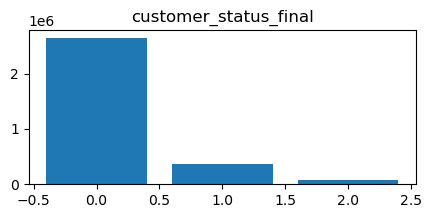

In [4]:
plt.figure(figsize=(5,2))
plt.bar(database['customer_status_final'].unique(),database['customer_status_final'].value_counts())
plt.title('customer_status_final')
plt.show()

Nuestra variable target será "customer_staus_final"

In [5]:
database.columns

Index(['account__id', 'customer_status_final', '2021-01-31', '2021-02-28',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-05-31', '2022-06-30',
       '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
       '2022-12-31'],
      dtype='object')

In [6]:
database.isna().sum()

account__id              0
customer_status_final    0
2021-01-31               0
2021-02-28               0
2021-03-31               0
2021-04-30               0
2021-05-31               0
2021-06-30               0
2021-07-31               0
2021-08-31               0
2021-09-30               0
2021-10-31               0
2021-11-30               0
2021-12-31               0
2022-01-31               0
2022-02-28               0
2022-03-31               0
2022-05-31               0
2022-06-30               0
2022-07-31               0
2022-08-31               0
2022-09-30               0
2022-10-31               0
2022-11-30               0
2022-12-31               0
dtype: int64

In [7]:
dbSample = database.head(300000)

In [8]:
db = dbSample.drop(['account__id'], axis = 1)

In [9]:
correl = db.corr()
correl

,customer_status_final,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
customer_status_final,1.000000,0.055341,0.056786,0.059044,0.072635,0.087505,0.103085,0.127115,0.157986,0.184003,...,0.235281,0.247817,0.288791,0.375259,0.576683,0.712505,0.792030,0.852438,0.882648,0.877221
2021-01-31,0.055341,1.000000,0.732058,0.355689,0.223739,0.127025,0.092118,0.081535,0.073110,0.056383,...,0.020160,0.020762,0.019173,0.018313,0.016635,0.018021,0.014942,0.016312,0.015777,0.014816
2021-02-28,0.056786,0.732058,1.000000,0.504573,0.316990,0.189467,0.125822,0.082035,0.069849,0.058784,...,0.029614,0.028838,0.020558,0.019025,0.015687,0.015866,0.015712,0.016387,0.016265,0.014097
2021-03-31,0.059044,0.355689,0.504573,1.000000,0.601589,0.337747,0.201150,0.104261,0.068834,0.063791,...,0.028066,0.027324,0.025526,0.020868,0.018684,0.021435,0.020281,0.020908,0.019126,0.017148
2021-04-30,0.072635,0.223739,0.316990,0.601589,1.000000,0.570647,0.345267,0.177567,0.121167,0.092143,...,0.049396,0.045697,0.043870,0.034505,0.029409,0.028727,0.027580,0.027986,0.025830,0.022533
2021-05-31,0.087505,0.127025,0.189467,0.337747,0.570647,1.000000,0.598242,0.324800,0.198657,0.134138,...,0.067476,0.063866,0.053594,0.043838,0.039902,0.040048,0.038542,0.037640,0.035162,0.031090
2021-06-30,0.103085,0.092118,0.125822,0.201150,0.345267,0.598242,1.000000,0.554466,0.343652,0.214905,...,0.082279,0.074326,0.062052,0.063685,0.055870,0.051403,0.047731,0.046494,0.044658,0.039270
2021-07-31,0.127115,0.081535,0.082035,0.104261,0.177567,0.324800,0.554466,1.000000,0.613267,0.385924,...,0.099668,0.095645,0.076893,0.073015,0.070326,0.061997,0.060277,0.057484,0.055551,0.050994
2021-08-31,0.157986,0.073110,0.069849,0.068834,0.121167,0.198657,0.343652,0.613267,1.000000,0.640058,...,0.117491,0.116716,0.091368,0.089238,0.088965,0.082179,0.078444,0.077036,0.074531,0.069137
2021-09-30,0.184003,0.056383,0.058784,0.063791,0.092143,0.134138,0.214905,0.385924,0.640058,1.000000,...,0.129254,0.126159,0.102529,0.100839,0.102033,0.096721,0.094132,0.092469,0.089323,0.083569


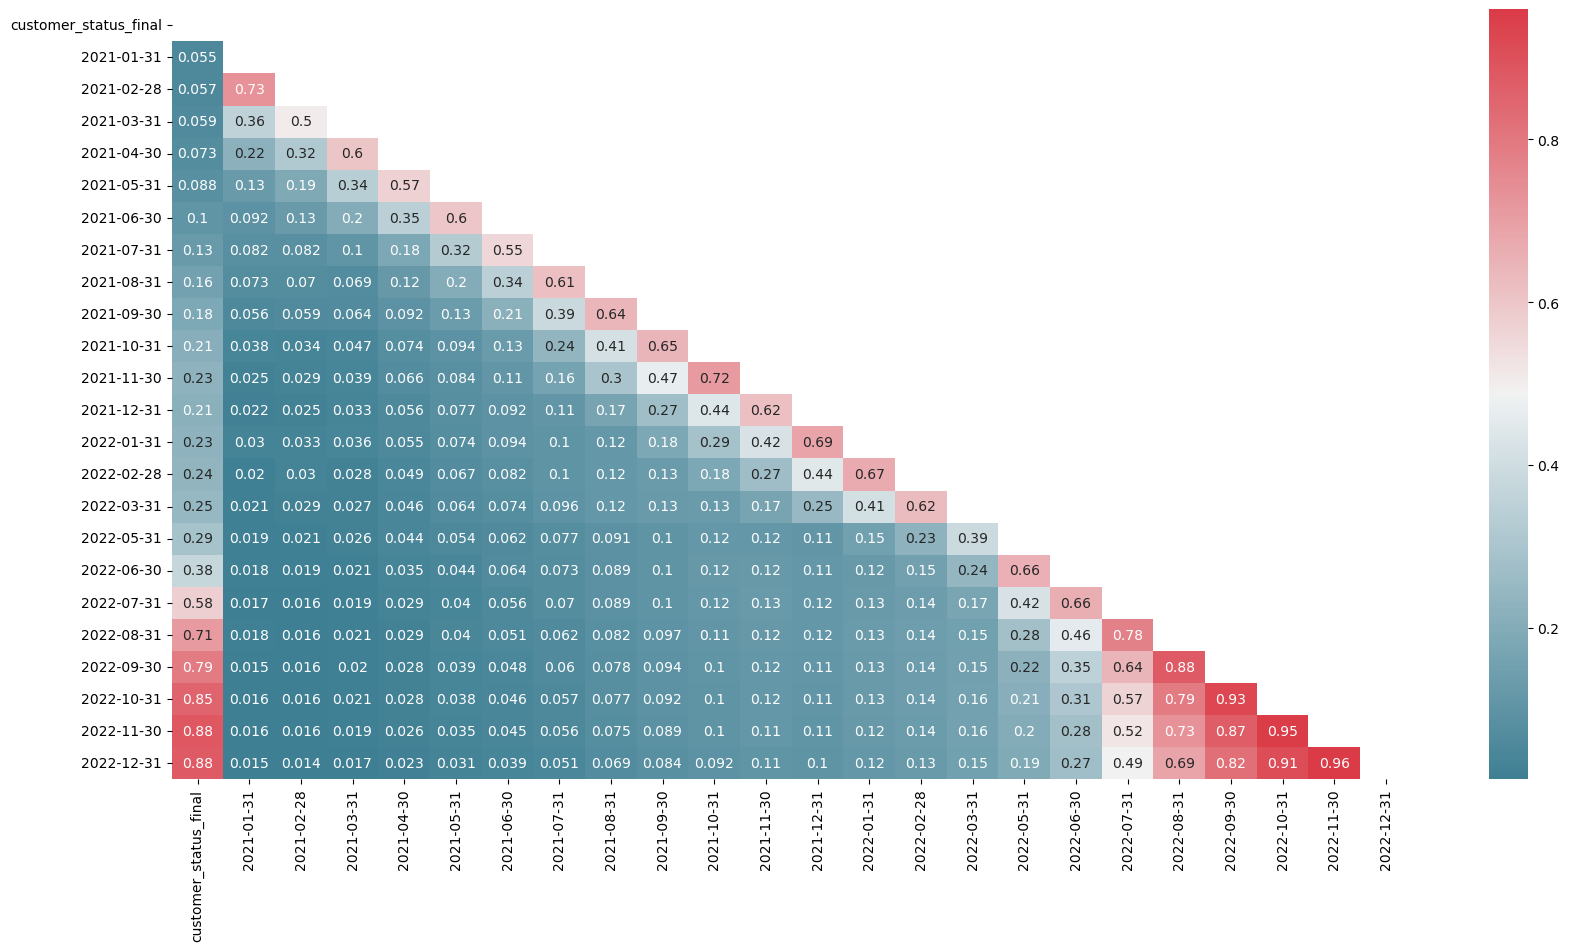

In [10]:
mask=np.triu(np.ones_like(correl, dtype=bool))

f, ax=plt.subplots(figsize=(20, 10))                 

cmap=sns.diverging_palette(220, 10, as_cmap=True)   

sns.heatmap(correl, mask=mask, cmap=cmap, annot=True)
plt.show()

In [11]:
x = db.drop(['customer_status_final'], axis = 1)
y = db['customer_status_final']

### KNN Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [13]:
x.shape, y.shape

((300000, 23), (300000,))

In [14]:
X_train.shape, X_test.shape

((225000, 23), (75000, 23))

In [15]:
model = KNeighborsRegressor(n_neighbors=17)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=17)

In [16]:
predictions_train = model.predict(X_train)
predictions_train

array([0., 0., 0., ..., 1., 0., 0.])

In [17]:
score_train = model.score(X_train, y_train)
score_train

0.9938609351504112

In [18]:
predictions_test = model.predict(X_test)
predictions_test

array([0., 0., 0., ..., 0., 1., 0.])

In [19]:
score_test = model.score(X_test, y_test)
score_test

0.9930605504086804

In [20]:
scores = []
for k in range(10,30):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    scores.append(score)

In [21]:
scores

[0.9940135613864858,
 0.99390777618919,
 0.9937651448786111,
 0.9936218288677773,
 0.9935127810023138,
 0.993367955480156,
 0.9932415741419136,
 0.9930605504086804,
 0.9930581251174866,
 0.9930174560777549,
 0.9929338172833011,
 0.992842360215471,
 0.9927721124647836,
 0.9927058075816197,
 0.9927016448033888,
 0.992675485298546,
 0.9926015384312179,
 0.992526250918897,
 0.9924574855589618,
 0.9924217439847542]

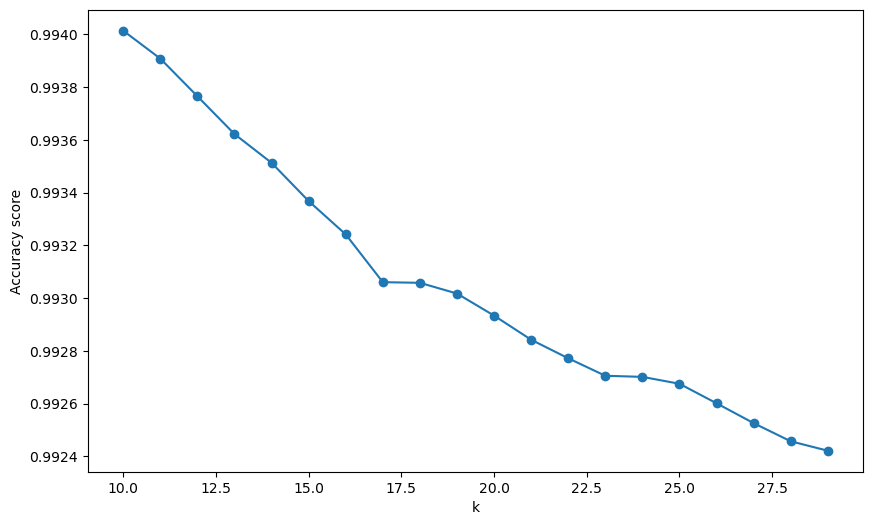

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(10,30), scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [23]:
MSEs = []

for k in range(10,30):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    MSE = mean_squared_error(y_test,preds)
    MSEs.append(MSE)

In [24]:
MSEs

[0.0010885333333333334,
 0.0011077685950413223,
 0.0011337037037037036,
 0.0011597633136094677,
 0.001179591836734694,
 0.001205925925925926,
 0.00122890625,
 0.0012618223760092273,
 0.0012622633744855968,
 0.0012696583564173593,
 0.0012848666666666667,
 0.0013014965986394554,
 0.0013142699724517904,
 0.0013263264020163831,
 0.0013270833333333333,
 0.0013318400000000002,
 0.0013452859960552267,
 0.0013589757658893464,
 0.0013714795918367347,
 0.0013779785969084424]

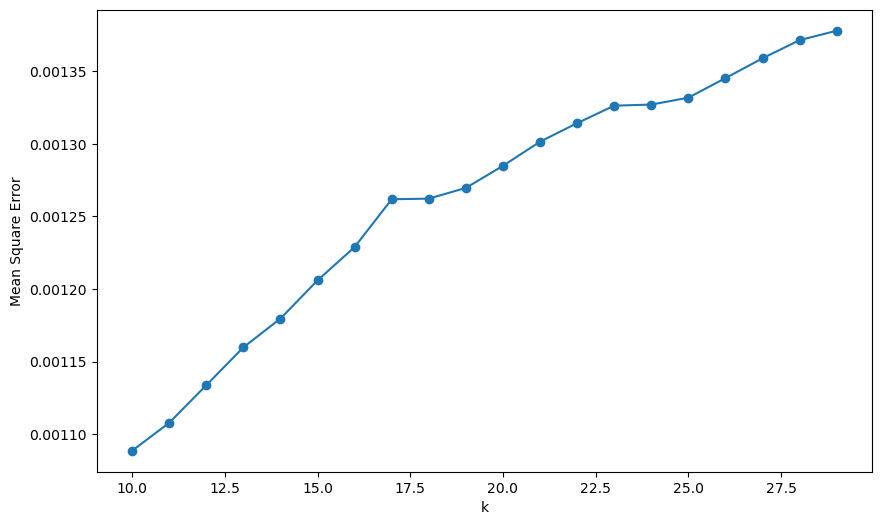

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(10,30), MSEs, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
plt.show()

In [26]:
classification = LogisticRegression(random_state=42, solver='lbfgs',class_weight='balanced').fit(X_train, y_train)

/Users/laura.chavez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
classification.coef_, classification.intercept_, classification.n_iter_

(array([[-0.05784438, -0.05132063, -0.02079696, -0.02859475, -0.0280922 ,
         -0.00405041, -0.03908249, -0.02569547, -0.03436059, -0.05381666,
         -0.04416953, -0.03100426, -0.02993541, -0.03189203, -0.01863218,
         -0.03259159,  0.01421541, -0.07630336, -0.00678173, -0.03052085,
         -0.06419252, -0.03820728, -0.03102842],
        [ 0.03089947,  0.05332582,  0.00640511,  0.0329656 ,  0.01644326,
          0.00727474,  0.02259149,  0.00896832,  0.02027558,  0.02872374,
          0.02166441,  0.01371292,  0.01082056,  0.01903363,  0.00963547,
          0.01959529,  0.03654999, -0.00389577,  0.00088634,  0.00377356,
          0.03242491,  0.01714768,  0.01942343],
        [ 0.02694491, -0.00200519,  0.01439186, -0.00437085,  0.01164894,
         -0.00322432,  0.01649101,  0.01672715,  0.014085  ,  0.02509293,
          0.02250512,  0.01729133,  0.01911486,  0.0128584 ,  0.0089967 ,
          0.01299629, -0.05076539,  0.08019913,  0.00589539,  0.02674729,
          0.03

#Evalaución de resultados

In [28]:
from sklearn.metrics import confusion_matrix

y_pred_train = classification.predict(X_train)
cm=confusion_matrix(y_pred_train, y_train)
cm

array([[189890,    216,      0],
       [  3184,  22664,     37],
       [   342,   3699,   4968]])

In [29]:
db.customer_status_final.value_counts()

customer_status_final
0    257923
1     35362
2      6715
Name: count, dtype: int64

In [30]:
y_train.value_counts()

customer_status_final
0    193416
1     26579
2      5005
Name: count, dtype: int64

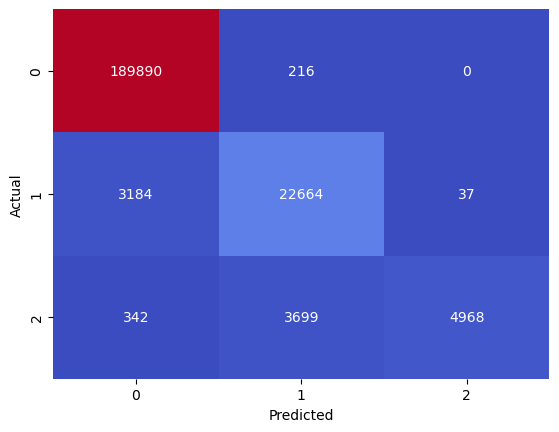

In [31]:
sns.heatmap(cm, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

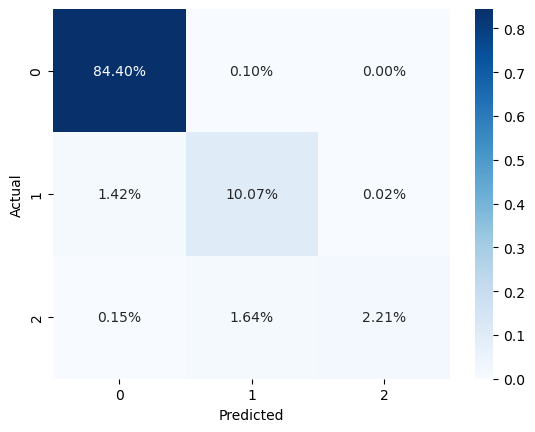

In [32]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
y_pred_test = classification.predict(X_test)
cm_test = confusion_matrix(y_pred_test, y_test)
cm_test

array([[63287,    65,     0],
       [ 1103,  7504,     9],
       [  117,  1214,  1701]])

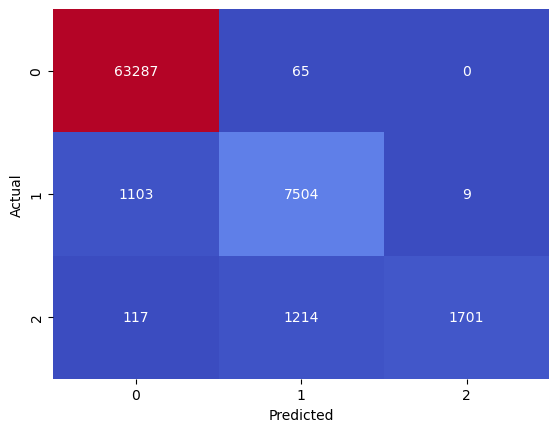

In [34]:
sns.heatmap(cm_test, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

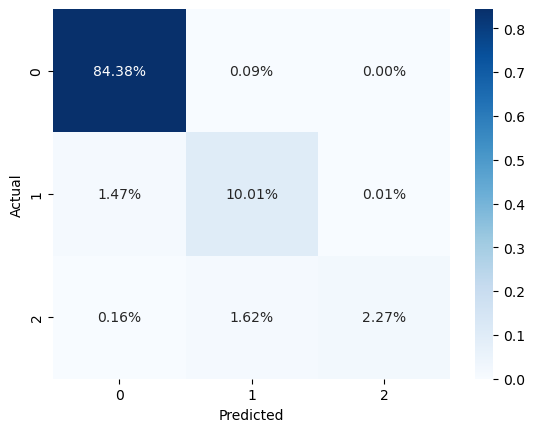

In [35]:
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
y_train

57598     0
180460    0
23662     0
162164    0
188753    0
         ..
212912    1
65615     0
253799    1
210755    0
56088     0
Name: customer_status_final, Length: 225000, dtype: int64

In [37]:
X_test

,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,...,2022-02-28,2022-03-31,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
18828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,10.0
219348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
51852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,10.0,41.0,71.0,102.0


In [38]:
yunir = pd.DataFrame(y_test)

In [39]:
yunir

,customer_status_final
18828,0
128595,0
119067,0
219348,0
131381,0
...,...
221177,0
296988,0
51852,0
295764,1


In [40]:
finalTest = X_test.merge(yunir, how='inner', left_index=True,right_index=True)

In [41]:
finalTest.to_csv('datos_test.csv')